In [1]:
import pandas as pd
import seaborn as sns

In [4]:
players = pd.read_csv('clean_data/players.csv')
career = pd.read_csv('clean_data/player_career_stats.csv')
means = pd.read_csv('clean_data/player_career_mean.csv')
scoring = pd.read_csv('clean_data/season_scoring.csv')

In [5]:
players[:4]

,Unnamed: 0,name,pos,age,ai
0,1,Vasile Halip,W,30,396
1,2,Ilya Tonkonogov,D,28,388
2,3,Cyrille Boulanger,W,29,383
3,4,Joshua Adams,C,28,372


In [12]:
#scores = scores.drop(columns='Unnamed: 0')
players = players.drop(columns=['Unnamed: 0'])

In [14]:
players[:3]

,name,pos,age,ai
0,Vasile Halip,W,30,396
1,Ilya Tonkonogov,D,28,388
2,Cyrille Boulanger,W,29,383


In [15]:
players.sort_values(by='name').reset_index(drop=True)[:3]

,name,pos,age,ai
0,Alberts Timanovskis,C,23,277
1,Andris Kraulis,W,20,197
2,Atis Zilgalvis,W,24,328


In [19]:
#scoring['name'] = scoring['index']
scoring = scoring.drop(columns='Unnamed: 0')
scoring[:3]

,Total_asists,Total_goals,Total_points,name
0,47.0,8.0,55.0,Dennis Ivarsson
1,26.0,14.0,40.0,Joshua Adams
2,9.0,29.0,38.0,Atis Zilgalvis


In [ ]:
scoring = scoring.drop(columns='index')

In [22]:
fine = pd.merge(players, scoring, on='name')

In [23]:
fine['Total_points'] = fine['Total_goals'] + fine['Total_asists']

In [24]:
fine[:3]

,name,pos,age,ai,Total_asists,Total_goals,Total_points
0,Vasile Halip,W,30,396,11.0,17.0,28.0
1,Ilya Tonkonogov,D,28,388,20.0,4.0,24.0
2,Cyrille Boulanger,W,29,383,8.0,16.0,24.0


##### pairplot

In [25]:
pair = fine[['pos','ai','Total_points','age']]

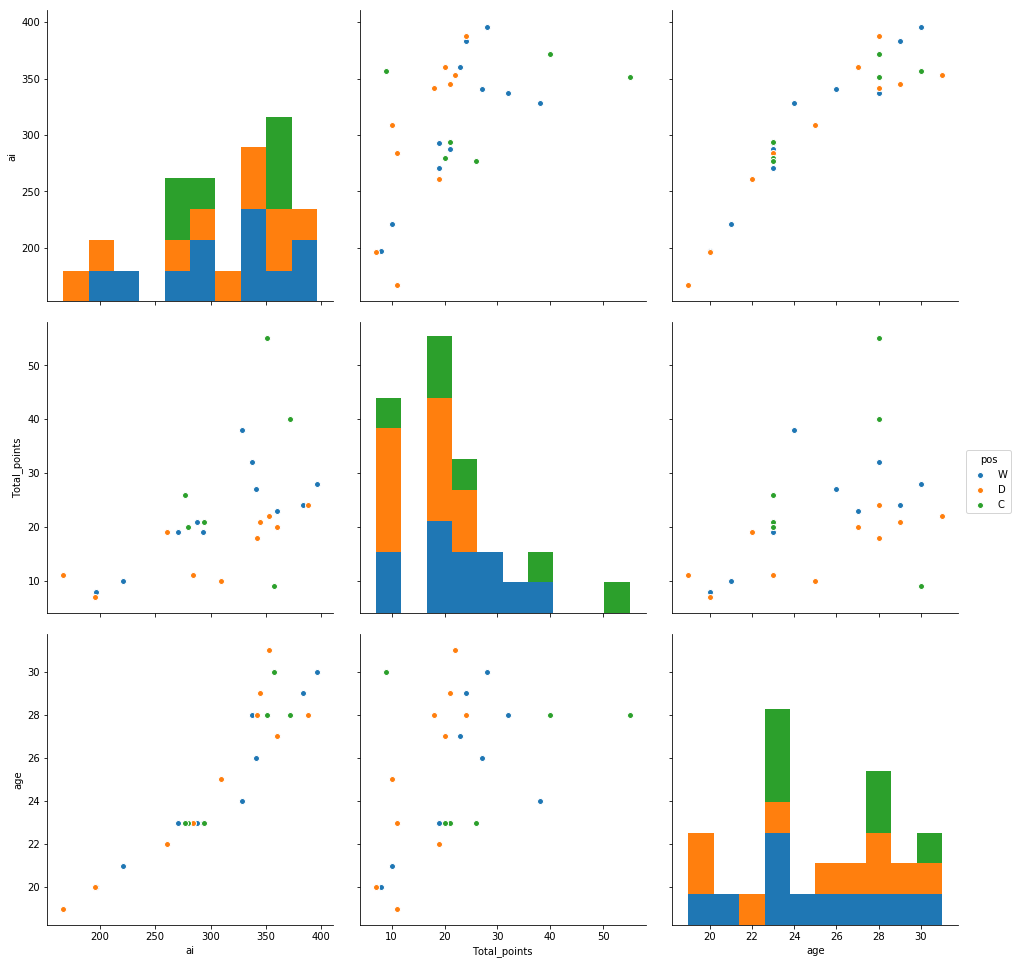

In [26]:
sns.pairplot(pair, hue='pos', size=4.5);

In [28]:
career = career.drop(columns='Unnamed: 0')

In [29]:
career[:3]

,name,games,goals,asists,points,seasons
0,Dennis Ivarsson,210,22,174,196,6.0
1,Vasile Halip,300,109,61,170,10.0
2,Maigonis Ušackis,277,94,37,131,10.0


In [30]:
career['name'] = career['name'].str.strip()

In [31]:
fine = fine.sort_values(by=['name']).reset_index(drop=True)
career = career.sort_values(by=['name']).reset_index(drop=True)

In [32]:
data = pd.merge(fine,career, left_on='name', right_on='name',how='outer')

In [33]:
data[:3]

,name,pos,age,ai,Total_asists,Total_goals,Total_points,games,goals,asists,points,seasons
0,Alberts Timanovskis,C,23.0,277.0,17.0,9.0,26.0,135,6,18,24,6.0
1,Andris Kraulis,W,20.0,197.0,6.0,2.0,8.0,10,2,1,3,4.0
2,Atis Zilgalvis,W,24.0,328.0,9.0,29.0,38.0,194,59,15,74,7.0


In [34]:
means['name'] = means['name'].str.strip()

In [36]:
means = means.drop(columns='Unnamed: 0')
means = means.sort_values(by=['name']).reset_index(drop=True)

In [37]:
means[:4]

,name,Mgames,Mshots,Mgoals,Masists,Mgame_coef,Minj
0,Alberts Timanovskis,22.50,19.00,1.00,3.00,-4.83,2.50
1,Andris Kraulis,3.33,3.00,0.67,0.33,-1.33,1.00
2,Atis Zilgalvis,27.71,58.14,8.43,2.14,-2.57,0.14
3,Bohuslav Kotrba,27.44,42.33,1.44,8.00,7.22,2.67


In [38]:
all_together = pd.merge(data,means, left_on='name', right_on='name',how='outer')

In [39]:
all_together.to_csv('FINAL_TABLE.csv')

In [43]:
all_together = all_together.dropna()

In [44]:
all_together[:3]

,name,pos,age,ai,Total_asists,Total_goals,Total_points,games,goals,asists,points,seasons,Mgames,Mshots,Mgoals,Masists,Mgame_coef,Minj
0,Alberts Timanovskis,C,23.0,277.0,17.0,9.0,26.0,135,6,18,24,6.0,22.50,19.00,1.00,3.00,-4.83,2.50
1,Andris Kraulis,W,20.0,197.0,6.0,2.0,8.0,10,2,1,3,4.0,3.33,3.00,0.67,0.33,-1.33,1.00
2,Atis Zilgalvis,W,24.0,328.0,9.0,29.0,38.0,194,59,15,74,7.0,27.71,58.14,8.43,2.14,-2.57,0.14


In [45]:
all_def = all_together.loc[data['pos'] =='D']

In [46]:
all_w = all_together.loc[data['pos'] =='W']

In [47]:
all_c = all_together.loc[data['pos'] =='C']

In [52]:
w = all_w[['pos','age','ai']]
d = all_def[['pos','age','ai']]
c = all_c[['pos','age','ai']]

In [53]:
dataset = pd.concat([w,c,d])

### age and ai

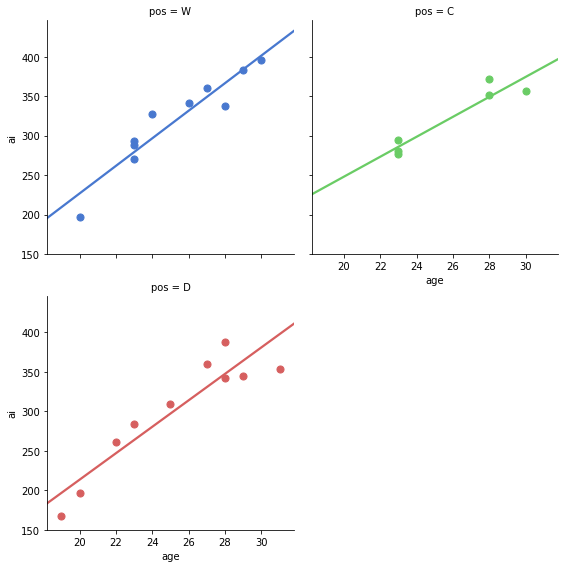

In [54]:
sns.lmplot(x="age", y="ai", col="pos", hue="pos", data=dataset,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

### Total points and AI

In [58]:
w = all_w[['pos','Total_points','ai']]
d = all_def[['pos','Total_points','ai']]
c = all_c[['pos','Total_points','ai']]

In [61]:
dataset = pd.concat([w,c,d])

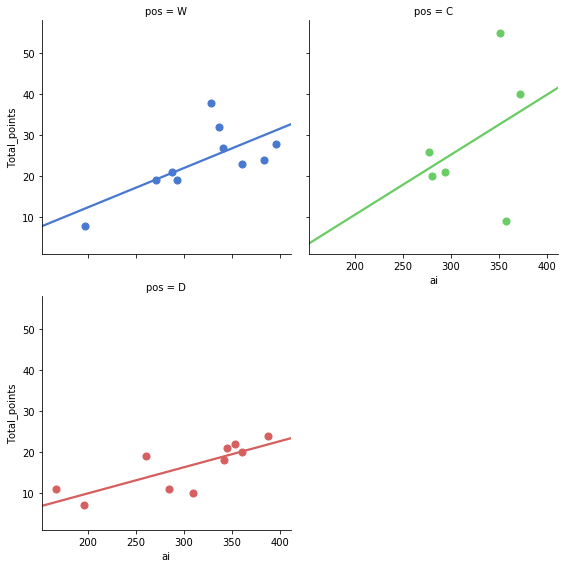

In [64]:
sns_plot = sns.lmplot(x="ai", y="Total_points", col="pos", hue="pos", data=dataset,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

In [65]:
sns_plot.savefig("clean_data/total_points.png")